In [ ]:
from google.colab import drive
import librosa
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os

In [ ]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
audio_path = "/content/drive/MyDrive/Projects/ML for AD and TS/Nelson_Mandela/"
FOLDER_PATH = 'Nelson_Mandela'
ROOT_PATH = '/content/drive/MyDrive/Projects/ML for AD and TS/'
dataset_length = len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)))
print(dataset_length)
y = []
sr = []
D = []
S_db = []
S = []
S_db_mel = []
mfccs = []

train_feature = []

for file_name in os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)):
  y1, sr1 = librosa.load(audio_path + file_name)
  y.append(y1)
  sr.append(sr1)

  D1 = librosa.stft(y1)
  S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)
  D.append(D1)
  S_db.append(S_db1)

  S1 = librosa.feature.melspectrogram(y=y1,
                                   sr=sr1,
                                   n_mels=128 * 2,)
  S_db_mel1 = librosa.amplitude_to_db(S1, ref=np.max)
  S.append(S1)
  S_db_mel.append(S_db_mel1)
  train_feature.append(S_db_mel1.T)

  audio1, sr1 = librosa.load(audio_path + file_name, sr=None, duration=1)
  mfccs1 = librosa.feature.mfcc(y=audio1, sr=sr1, n_mfcc=13)
  mfccs.append(mfccs1)


# print(f'y: {y[0][0]}')
# print(f'shape y: {y.shape}')
# print(f'sr: {sr}')

# y[:10]
# sr[:10]
# D[:10]
# S[:10]


1500


In [ ]:
# Prepare test data!!

TEST_PATH = 'Nelson_Mandela'
y_test = []
sr_test = []
D_test = []
S_db_test = []
S_test = []
S_db_mel_test = []

test_feature = []

print(len(os.listdir(os.path.join(ROOT_PATH, TEST_PATH))))
for file_name in os.listdir(os.path.join(ROOT_PATH, TEST_PATH)):
  y1, sr1 = librosa.load(audio_path + file_name)
  y_test.append(y1)
  sr_test.append(sr1)

  D1 = librosa.stft(y1)
  S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)
  D_test.append(D1)
  S_db_test.append(S_db1)

  S1 = librosa.feature.melspectrogram(y=y1,
                                   sr=sr1,
                                   n_mels=128 * 2,)
  S_db_mel1 = librosa.amplitude_to_db(S1, ref=np.max)
  S_test.append(S1)
  S_db_mel_test.append(S_db_mel1)
  test_feature.append(S_db_mel1.T)


1500


In [ ]:
print(np.shape(train_feature))
print(np.shape(test_feature))

(1500, 44, 256)
(1500, 44, 256)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Flatten the features for SVM
X_train_svm = np.concatenate(train_feature)
X_test_svm = np.concatenate(test_feature)

# Flatten the features for Isolation Forest
X_train_iforest = np.concatenate(train_feature)
X_test_iforest = np.concatenate(test_feature)

# Label normal samples as 1 and anomalies as -1
y_train = np.ones(X_train_svm.shape[0])
y_test = np.ones(X_test_svm.shape[0])

#y_test[:num_anomalies] = -1

# Train SVM
svm_model = OneClassSVM(kernel='linear', nu=0.01)  # You can adjust hyperparameters
svm_model.fit(X_train_svm)

# Train Isolation Forest
iforest_model = IsolationForest(contamination=0.01)  # You can adjust hyperparameters
iforest_model.fit(X_train_iforest)

# Make predictions
svm_predictions = svm_model.predict(X_test_svm)
iforest_predictions = iforest_model.predict(X_test_iforest)

# Get the list of test file names
test_file_names = os.listdir(os.path.join(ROOT_PATH, TEST_PATH))
test_file_names.sort()  # Sort file names to match the order of predictions

# Print predictions and file names for SVM
print("SVM Predictions:")
print(svm_predictions)
print("File Names:")
print(test_file_names)

# Print predictions and file names for Isolation Forest
print("Isolation Forest Predictions:")
print(iforest_predictions)
print("File Names:")
print(test_file_names)

# Evaluate the models
# print("SVM Classification Report:")
# print(classification_report(y_test, svm_predictions, zero_division=1))


# print("Isolation Forest Classification Report:")
# print(classification_report(y_test, iforest_predictions, zero_division=1))


SVM Predictions:
[1 1 1 ... 1 1 1]
File Names:
['0.wav', '1.wav', '10.wav', '100.wav', '1000.wav', '1001.wav', '1002.wav', '1003.wav', '1004.wav', '1005.wav', '1006.wav', '1007.wav', '1008.wav', '1009.wav', '101.wav', '1010.wav', '1011.wav', '1012.wav', '1013.wav', '1014.wav', '1015.wav', '1016.wav', '1017.wav', '1018.wav', '1019.wav', '102.wav', '1020.wav', '1021.wav', '1022.wav', '1023.wav', '1024.wav', '1025.wav', '1026.wav', '1027.wav', '1028.wav', '1029.wav', '103.wav', '1030.wav', '1031.wav', '1032.wav', '1033.wav', '1034.wav', '1035.wav', '1036.wav', '1037.wav', '1038.wav', '1039.wav', '104.wav', '1040.wav', '1041.wav', '1042.wav', '1043.wav', '1044.wav', '1045.wav', '1046.wav', '1047.wav', '1048.wav', '1049.wav', '105.wav', '1050.wav', '1051.wav', '1052.wav', '1053.wav', '1054.wav', '1055.wav', '1056.wav', '1057.wav', '1058.wav', '1059.wav', '106.wav', '1060.wav', '1061.wav', '1062.wav', '1063.wav', '1064.wav', '1065.wav', '1066.wav', '1067.wav', '1068.wav', '1069.wav', '107.wa

In [ ]:
# Create and Train Model and Test (Isolation Forest)

from sklearn.ensemble import IsolationForest

# Create and train the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X_train_iforest)

# Predict on the test set
y_pred = clf.predict(X_test_iforest)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

y_test shape: (66000,)
X_test_svm shape: (66000, 256)
X_test_iforest shape: (66000, 256)
Count of SVM Anomalies: 659
Count of Isolation Forest Anomalies: 660


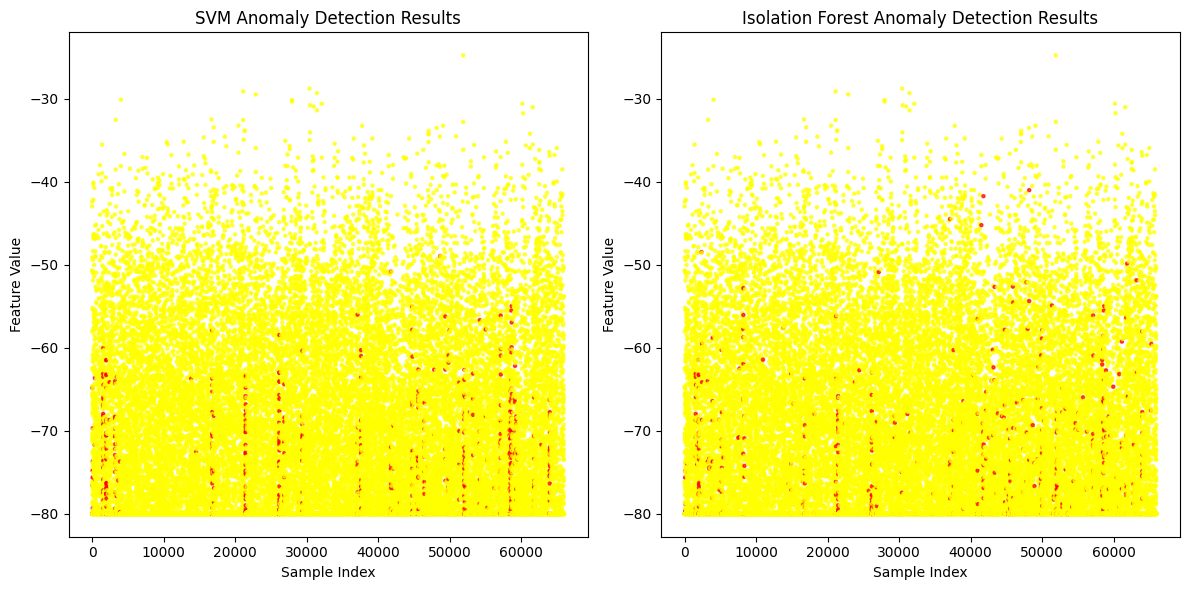

In [ ]:
print('y_test shape:',np.shape(y_test))
print('X_test_svm shape:',np.shape(X_test_svm))
print('X_test_iforest shape:',np.shape(X_test_iforest))

import matplotlib.pyplot as plt

# Define colors for anomalies and non-anomalies
anomaly_color = 'red'
non_anomaly_color = 'yellow'

# Plot SVM Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), X_test_svm[:, 0], c=[anomaly_color if pred == -1 else non_anomaly_color if pred == 1 else 'black' for pred in svm_predictions], s=5, alpha=0.7)
plt.title('SVM Anomaly Detection Results')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')

# Plot Isolation Forest Results
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), X_test_iforest[:, 0], c=[anomaly_color if pred == -1 else non_anomaly_color if pred == 1 else 'black' for pred in iforest_predictions], s=5, alpha=0.7)
plt.title('Isolation Forest Anomaly Detection Results')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')

# Count occurrences of anomalous predictions in SVM
svm_anomalies_count = sum(1 for pred in svm_predictions if pred == -1)
print("Count of SVM Anomalies:", svm_anomalies_count)

# Count occurrences of anomalous predictions in Isolation Forest
iforest_anomalies_count = sum(1 for pred in iforest_predictions if pred == -1)
print("Count of Isolation Forest Anomalies:", iforest_anomalies_count)

plt.tight_layout()
plt.show()


In [ ]:
# Prepare test data!!

TEST_PATH = 'Mix_Voice/'
ROOT_PATH = '/content/drive/MyDrive/Projects/ML for AD and TS/'
y_test = []
sr_test = []
D_test = []
S_db_test = []
S_test = []
S_db_mel_test = []

test_feature = []

print(len(os.listdir(os.path.join(ROOT_PATH, TEST_PATH))))
for file_name in os.listdir(os.path.join(ROOT_PATH, TEST_PATH)):
  y1, sr1 = librosa.load(os.path.join(ROOT_PATH, TEST_PATH) + file_name)
  y_test.append(y1)
  sr_test.append(sr1)

  D1 = librosa.stft(y1)
  S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)
  D_test.append(D1)
  S_db_test.append(S_db1)

  S1 = librosa.feature.melspectrogram(y=y1,
                                   sr=sr1,
                                   n_mels=128 * 2,)
  S_db_mel1 = librosa.amplitude_to_db(S1, ref=np.max)
  S_test.append(S1)
  S_db_mel_test.append(S_db_mel1)
  test_feature.append(S_db_mel1.T)

130


In [ ]:
# Flatten the features for SVM
X_train_svm = np.concatenate(train_feature)
X_test_svm = np.concatenate(test_feature)

# Flatten the features for Isolation Forest
X_train_iforest = np.concatenate(train_feature)
X_test_iforest = np.concatenate(test_feature)

# Label normal samples as 1 and anomalies as -1
y_train = np.ones(X_train_svm.shape[0])
y_test = np.ones(X_test_svm.shape[0])

#y_test[:num_anomalies] = -1

# Train SVM
svm_model = OneClassSVM(kernel='linear', nu=0.01)  # You can adjust hyperparameters
svm_model.fit(X_train_svm)

# Train Isolation Forest
iforest_model = IsolationForest(contamination=0.01)  # You can adjust hyperparameters
iforest_model.fit(X_train_iforest)

# Make predictions
svm_predictions = svm_model.predict(X_test_svm)
iforest_predictions = iforest_model.predict(X_test_iforest)

# Get the list of test file names
test_file_names = os.listdir(os.path.join(ROOT_PATH, TEST_PATH))
test_file_names.sort()  # Sort file names to match the order of predictions

# Print predictions and file names for SVM
print("SVM Predictions:")
print(svm_predictions)
print("File Names:")
print(test_file_names)

# Print predictions and file names for Isolation Forest
print("Isolation Forest Predictions:")
print(iforest_predictions)

SVM Predictions:
[1 1 1 ... 1 1 1]
File Names:
['0.wav', '1.wav', '10.wav', '11.wav', '12.wav', '13.wav', '14.wav', '1400.wav', '1401.wav', '1402.wav', '1403.wav', '1404.wav', '1405.wav', '1406.wav', '1407.wav', '1408.wav', '1409.wav', '1410.wav', '1411.wav', '1412.wav', '1413.wav', '1414.wav', '1415.wav', '1416.wav', '1417.wav', '1418.wav', '1419.wav', '1420.wav', '1421.wav', '1422.wav', '1423.wav', '1424.wav', '1425.wav', '1426.wav', '1427.wav', '1428.wav', '1429.wav', '1430.wav', '1431.wav', '1432.wav', '1433.wav', '1434.wav', '1435.wav', '1436.wav', '1437.wav', '1438.wav', '1439.wav', '1440.wav', '1441.wav', '1442.wav', '1443.wav', '1444.wav', '1445.wav', '1446.wav', '1447.wav', '1448.wav', '1449.wav', '1450.wav', '1451.wav', '1452.wav', '1453.wav', '1454.wav', '1455.wav', '1456.wav', '1457.wav', '1458.wav', '1459.wav', '1460.wav', '1461.wav', '1462.wav', '1463.wav', '1464.wav', '1465.wav', '1466.wav', '1467.wav', '1468.wav', '1469.wav', '1470.wav', '1471.wav', '1472.wav', '1473.wa

In [ ]:
# Create and train the Isolation Forest model
clf.fit(X_train_iforest)

# Predict on the test set
y_pred = clf.predict(X_test_iforest)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

y_test shape: (5720,)
X_test_svm shape: (5720, 256)
X_test_iforest shape: (5720, 256)
Count of SVM Anomalies: 30
Count of Isolation Forest Anomalies: 45


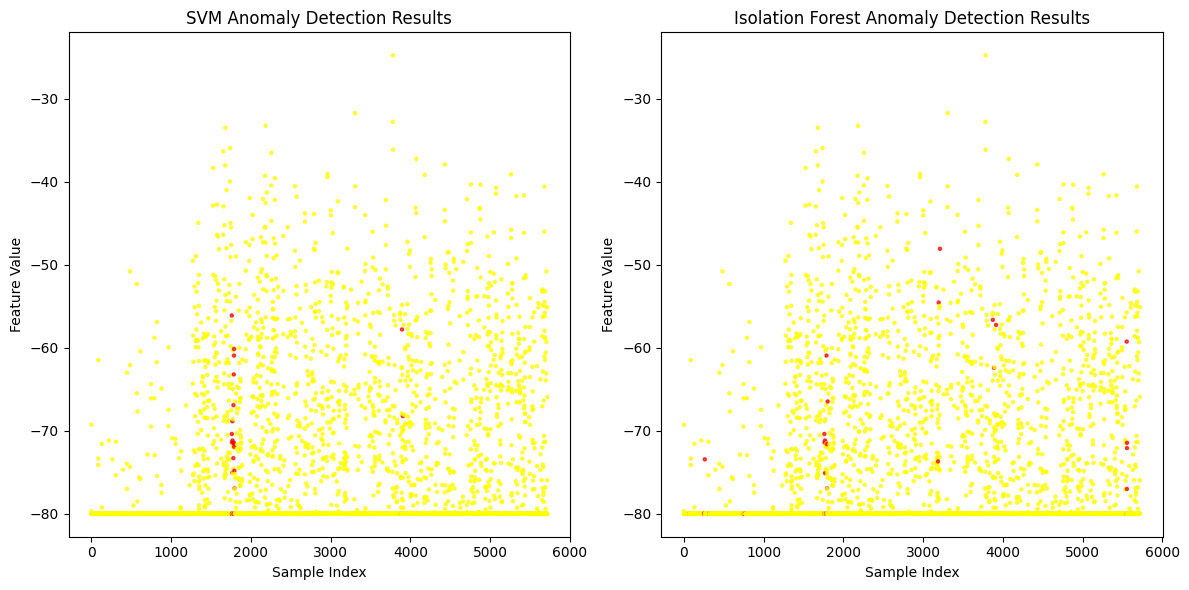

In [ ]:
print('y_test shape:',np.shape(y_test))
print('X_test_svm shape:',np.shape(X_test_svm))
print('X_test_iforest shape:',np.shape(X_test_iforest))

# Plot SVM Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), X_test_svm[:, 0], c=[anomaly_color if pred == -1 else non_anomaly_color if pred == 1 else 'black' for pred in svm_predictions], s=5, alpha=0.7)
plt.title('SVM Anomaly Detection Results')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')

# Plot Isolation Forest Results
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), X_test_iforest[:, 0], c=[anomaly_color if pred == -1 else non_anomaly_color if pred == 1 else 'black' for pred in iforest_predictions], s=5, alpha=0.7)
plt.title('Isolation Forest Anomaly Detection Results')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')

# Count occurrences of anomalous predictions in SVM
svm_anomalies_count = sum(1 for pred in svm_predictions if pred == -1)
print("Count of SVM Anomalies:", svm_anomalies_count)

# Count occurrences of anomalous predictions in Isolation Forest
iforest_anomalies_count = sum(1 for pred in iforest_predictions if pred == -1)
print("Count of Isolation Forest Anomalies:", iforest_anomalies_count)

plt.tight_layout()
plt.show()
